# Machine Learning Project 
# group 4

### Eduardo Murillo
### Arpit Gupta

# Regression 

In [1]:
#importing Libraries to read the data

import pandas as pd
import numpy as np

In [150]:
#Reading the Data

auto = pd.read_csv("C:\\Users\\arpit\\Desktop\\Used cars dataset\\autos.csv", encoding="latin-1")

In [151]:
auto.loc[:,'dateCrawled']

0         2016-03-24 11:52:17
1         2016-03-24 10:58:45
2         2016-03-14 12:52:21
3         2016-03-17 16:54:04
4         2016-03-31 17:25:20
                 ...         
371523    2016-03-14 17:48:27
371524    2016-03-05 19:56:21
371525    2016-03-19 18:57:12
371526    2016-03-20 19:41:08
371527    2016-03-07 19:39:19
Name: dateCrawled, Length: 371528, dtype: object

## Information About the data

In [4]:
#Information about the Data


#dateCrawled : when this ad was first crawled, all field-values are taken from this date
#name : "name" of the car
#seller : private or dealer
#offerType
#price : the price on the ad to sell the car
#abtest
#vehicleType
#yearOfRegistration : at which year the car was first registered
#gearbox : whether automatic or manual
#powerPS : power of the car in PS
#model : car model 
#kilometer : how many kilometers the car has driven
#monthOfRegistration : at which month the car was first registered
#fuelType : type of fuel car uses
#brand : car brand
#notRepairedDamage : if the car has a damage which is not repaired yet
#dateCreated : the date for which the ad at ebay was created
#postalCode 
#lastSeenOnline : when the crawler saw this ad last online


# Exploring Data

## Categorical Variable

In [5]:
 #The following data has 371528 rows and 20 columns
    
auto.shape

(371528, 20)

In [6]:
#checking the distribution of categorical variables
import matplotlib.pyplot as plt
import seaborn as sns

f=pd.melt(auto,value_vars=sorted(auto[['abtest','seller','offerType','vehicleType','gearbox','fuelType','brand','notRepairedDamage']]))
g=sns.FacetGrid(f,col='variable',col_wrap=4,sharex=False,sharey=False)
plt.xticks(rotation='vertical')
g=g.map(sns.countplot,'value')
[plt.setp(ax.get_xticklabels(),rotation=70) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

C:\Users\arpit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1200x600 with 8 Axes>

In [7]:
# Removing the outliers in the the categorical variables

#We can remove the seller column as there is only 3 cars sold by gewerblich while the rest of th cars are sold by privat
auto['seller'].value_counts()
auto = auto[auto['seller'] != 'gewerblich']
auto = auto.drop('seller', axis=1)

In [8]:
# Same is the case with the column offerType, we can remove this column as there are only 12 cars with the offertype gesuch
auto['offerType'].value_counts()
auto = auto[auto['offerType'] != 'gesuch']
auto = auto.drop('offerType', axis=1)


In [9]:
# checking the distribution of abtest column
auto['abtest'].value_counts()

test       192584
control    178941
Name: abtest, dtype: int64

In [10]:
# checking the distribution of vehicleType column
auto['vehicleType'].value_counts()

limousine     95893
kleinwagen    80022
kombi         67563
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

In [11]:
# checking the distribution of fuelType column
auto['fuelType'].value_counts()
auto = auto[auto['fuelType'] != 'andere']
auto = auto[auto['fuelType'] != 'hybrid']
auto = auto[auto['fuelType'] != 'elektro']


In [12]:
auto.head()

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [13]:
auto['fuelType'].unique()

array(['benzin', 'diesel', nan, 'lpg', 'cng'], dtype=object)

In [14]:
# checking the distribution of brand column
auto['brand'].value_counts()

volkswagen        79600
bmw               40253
opel              40113
mercedes_benz     35286
audi              32860
ford              25562
renault           17930
peugeot           11018
fiat               9665
seat               7020
mazda              5694
skoda              5641
smart              5239
citroen            5177
nissan             5032
toyota             4557
sonstige_autos     3869
hyundai            3643
mini               3389
volvo              3323
mitsubishi         3052
honda              2782
kia                2553
alfa_romeo         2345
suzuki             2327
porsche            2213
chevrolet          1842
chrysler           1452
dacia               900
jeep                807
daihatsu            804
subaru              778
land_rover          770
jaguar              621
trabant             550
daewoo              541
saab                529
rover               490
lancia              483
lada                225
Name: brand, dtype: int64

In [15]:
# checking the distribution of model column
auto['model'].value_counts()

golf               30055
andere             26243
3er                20563
polo               13090
corsa              12567
                   ...  
serie_2                8
rangerover             6
serie_3                4
serie_1                2
discovery_sport        1
Name: model, Length: 251, dtype: int64

In [16]:
# checking the distribution of brand column
auto['brand'].value_counts()

volkswagen        79600
bmw               40253
opel              40113
mercedes_benz     35286
audi              32860
ford              25562
renault           17930
peugeot           11018
fiat               9665
seat               7020
mazda              5694
skoda              5641
smart              5239
citroen            5177
nissan             5032
toyota             4557
sonstige_autos     3869
hyundai            3643
mini               3389
volvo              3323
mitsubishi         3052
honda              2782
kia                2553
alfa_romeo         2345
suzuki             2327
porsche            2213
chevrolet          1842
chrysler           1452
dacia               900
jeep                807
daihatsu            804
subaru              778
land_rover          770
jaguar              621
trabant             550
daewoo              541
saab                529
rover               490
lancia              483
lada                225
Name: brand, dtype: int64

## Continous Variables

In [17]:
#Since nrOfPictures have only one value i.e 0, It is of no use in regression and we can drop it
auto['nrOfPictures'].value_counts()
auto = auto.drop('nrOfPictures', axis=1)

In [18]:
auto['price'].describe()

count    3.709350e+05
mean     1.151552e+04
std      6.793571e+05
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [19]:
# The price column contains outliers the price is ranged from 0 to 2.14*10^9
auto = auto[(auto['price']<200000) & (auto['price'] > 100)]

In [20]:
auto['powerPS'].describe()

count    356476.000000
mean        117.122042
std         190.218067
min           0.000000
25%          75.000000
50%         107.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

In [21]:
# powerPS is ranged between 0 to 20000 PS, A car can't have 0 PS and usually have lesser than 1500 PS(Bugatti Cheron)
#So removing the outliers
auto = auto[(auto.powerPS < 1500) & (auto.powerPS > 10)]

In [22]:
#Year of registration
auto['yearOfRegistration'].describe()

count    320979.000000
mean       2003.839257
std          32.883113
min        1000.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

In [23]:
# Since the car was invented in 1885, we will set the range from 1885 to 2020
auto = auto[(auto['yearOfRegistration'] > 1884) & (auto['yearOfRegistration'] < 2020) ]

In [24]:
auto.head()

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,33775,2016-04-06 19:17:07


In [25]:
auto = auto[(auto['kilometer'] > 4999) & (auto['kilometer'] <= 150000)]
auto.describe()


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,320948.000000,320948.000000,320948.000000,320948.000000,320948.000000,320948.000000
mean,6222.561443,2003.624780,126.650632,125614.959433,5.985914,51487.757917
std,8400.725367,7.190689,65.075926,39168.669820,3.583698,25763.803483
min,101.000000,1910.000000,11.000000,5000.000000,0.000000,1067.000000
25%,1449.000000,1999.000000,80.000000,100000.000000,3.000000,31141.000000
50%,3499.000000,2004.000000,116.000000,150000.000000,6.000000,50678.000000
75%,7950.000000,2008.000000,150.000000,150000.000000,9.000000,72336.000000
max,199900.000000,2019.000000,1436.000000,150000.000000,12.000000,99998.000000


In [26]:
auto.columns

Index(['dateCrawled', 'name', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

In [27]:
#Removing the not necessary columns which are not useful in predicting price
auto = auto.drop(['dateCrawled', 'name', 'monthOfRegistration', 'dateCreated', 'postalCode','lastSeen'], axis=1)

In [28]:
auto.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
1,18300,test,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein
5,650,test,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja


# Imputing the null values

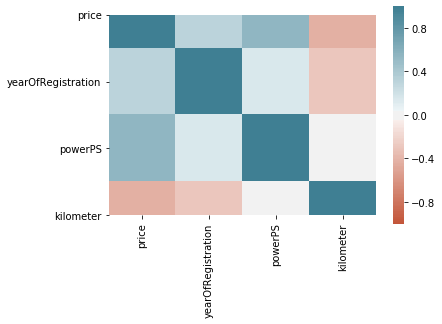

In [29]:
corr = auto.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [30]:
auto.isna().sum()

price                     0
abtest                    0
vehicleType           21117
yearOfRegistration        0
gearbox                6011
powerPS                   0
model                 12667
kilometer                 0
fuelType              19612
brand                     0
notRepairedDamage     46996
dtype: int64

In [31]:
# Since the vehicleType has 8 categories, we will create a new category of "Not Specified" for the null values
auto['vehicleType'].fillna(value='not-specified', inplace=True)

In [32]:
# we can impute the gear box null values with the mode
auto['gearbox'].fillna(value=auto['gearbox'].mode()[0], inplace=True)

In [33]:
#Since there are 250 unique values of model, we will impute the null values with "not Specified"
auto['model'].fillna(value='not-specified', inplace = True)

In [34]:
# imputing the mode in fuelType column
auto['fuelType'].fillna(value= auto['fuelType'].mode()[0], inplace=True)

In [35]:
# imputing th mode in notRepairedDamage
auto['notRepairedDamage'].fillna(value=auto['notRepairedDamage'].mode()[0], inplace=True)

In [36]:
auto.isna().sum()

price                 0
abtest                0
vehicleType           0
yearOfRegistration    0
gearbox               0
powerPS               0
model                 0
kilometer             0
fuelType              0
brand                 0
notRepairedDamage     0
dtype: int64

In [37]:
auto.head(3)

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
1,18300,test,coupe,2011,manuell,190,not-specified,125000,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,nein
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein


# Splitting Data for training and test

In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
auto['vehicleType'] = label_encoder.fit_transform(auto['vehicleType'])
auto['abtest'] = label_encoder.fit_transform(auto['abtest'])
auto['notRepairedDamage'] = label_encoder.fit_transform(auto['notRepairedDamage'])
auto['gearbox'] = label_encoder.fit_transform(auto['gearbox'])
auto['model'] = label_encoder.fit_transform(auto['model'])
auto['fuelType'] = label_encoder.fit_transform(auto['fuelType'])
auto['brand'] = label_encoder.fit_transform(auto['brand'])




In [39]:
#creating dummy variables for the categorical columns
dvehicletype = pd.get_dummies(auto['vehicleType'], columns = 'vehicleType', prefix = 'vehicleType')
dvehicletype
dABtest = pd.get_dummies(auto['abtest'], columns = 'abtest', prefix = 'abtest')
dgearbox = pd.get_dummies(auto['gearbox'], columns = 'gearbox', prefix = 'gearbox')
dfueltype = pd.get_dummies(auto['fuelType'], columns = 'fuelType', prefix = 'fuelType')



In [40]:
auto = pd.concat([auto, dvehicletype, dABtest, dgearbox, dfueltype], axis=1)

In [41]:
auto.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,...,vehicleType_7,vehicleType_8,abtest_0,abtest_1,gearbox_0,gearbox_1,fuelType_0,fuelType_1,fuelType_2,fuelType_3
1,18300,1,3,2011,1,190,163,125000,2,1,...,0,0,0,1,0,1,0,0,1,0
2,9800,1,8,2004,0,163,119,125000,2,14,...,0,1,0,1,1,0,0,0,1,0
3,1500,1,4,2001,1,75,118,150000,0,38,...,0,0,0,1,0,1,1,0,0,0
4,3600,1,4,2008,1,69,103,90000,2,31,...,0,0,0,1,0,1,0,0,1,0
5,650,1,6,1995,1,102,11,150000,0,2,...,0,0,0,1,0,1,1,0,0,0


In [42]:
# splitting data into dependent and independent variable
Y = auto[['price']]
X = auto.loc[:,auto.columns != 'price']

#converting Y into log 
#Y = np.log1p(Y)

In [43]:
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

In [44]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



###### We have used the minmax scaler because it is non distorting. It doesn't affect the higher values in the dataset. we have also removed the outliers and we dont have negative values in our dataset

# Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)

lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5641.555804648075

In [47]:
print('Train score: {:.4f}'.format(regressor.score(X_train,y_train)))
print('Test score: {:.4f}'.format(regressor.score(X_test,y_test)))


Train score: 0.5336
Test score: 0.5390


# SGD Regression

In [48]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 50, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print('Train score: {:.4f}' .format(sgd_reg.score(X_train, y_train)))
print('Test score: {:.4f}' .format(sgd_reg.score(X_test, y_test)))

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: -129673244.7389
Test score: -134827724.9413


C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


# KNN Regressor 

Text(0, 0.5, 'Accuracy')

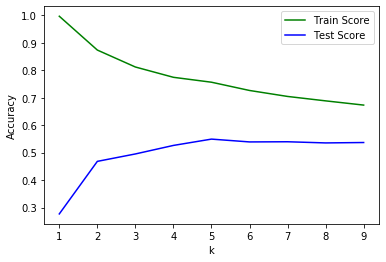

In [49]:
#running the regression on sample of 10000 rows
s_auto = auto.sample(n=10000, random_state = 0)
Y_s = s_auto[['price']]
X_s = s_auto.loc[:,s_auto.columns != 'price']
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(X_s, Y_s, random_state = 0)

from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_trains, y_trains)
    train_score_array.append(knn_reg.score(X_trains, y_trains))
    test_score_array.append(knn_reg.score(X_tests, y_tests))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')

In [50]:
#with K=5 the test score is the best
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_trains, y_trains)
print('Train score: {:.4f}' .format(knn_reg.score(X_trains, y_trains)))
print('Test score: {:.4f}' .format(knn_reg.score(X_tests, y_tests)))

Train score: 0.7563
Test score: 0.5493


In [51]:
from sklearn.metrics import mean_squared_error
y_pred = knn_reg.predict(X_test)

lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

15457.148344372594

# Ridge Regression

In [136]:
from  sklearn.linear_model import Ridge

x_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 100000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

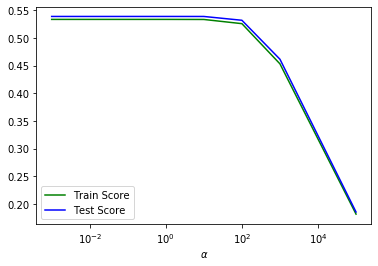

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [138]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.5336
Test score: 0.5389


In [139]:
from sklearn.metrics import mean_squared_error
y_pred = ridge.predict(X_test)

lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5641.644721260119

In [144]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = ridge, X = X_train, y= y_train, cv=10, n_jobs = -1)

In [145]:
accuracies

array([0.54562323, 0.52593951, 0.53090733, 0.54478516, 0.52513843,
       0.53328342, 0.53270487, 0.52418414, 0.5442949 , 0.52758152])

In [146]:
accuracies.mean()

0.5334442493520946

# Lasso Regression

In [56]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765144572965.4834, tolerance: 1711092631.077772
  positive)
C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 655082939071.2012, tolerance: 1711092631.077772
  positive)


Text(0.5, 0, '$\\alpha$')

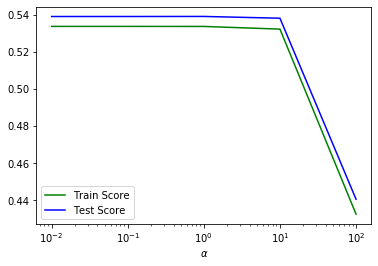

In [57]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [58]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.5336
Test score: 0.5389


C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765144572965.4834, tolerance: 1711092631.077772
  positive)


In [59]:
from sklearn.metrics import mean_squared_error
y_pred = lasso.predict(X_test)

lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5641.640527510929

# SVM regression

In [63]:
#running the regression on sample of 1000 rows
s_auto = auto.sample(n=1000)
Y_s = s_auto[['price']]
X_s = s_auto.loc[:,s_auto.columns != 'price']
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(X_s, Y_s, random_state = 0)

#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_trains)
X_tests = scaler.transform(X_tests)

In [64]:
#linear
from sklearn import svm
svm_reg = svm.SVR(kernel ='linear')
svm_reg.fit(X_trains, y_trains)
print('Train score: {:.4f}'.format(svm_reg.score(X_trains,y_trains)))
print('Test score: {:.4f}'.format(svm_reg.score(X_tests, y_tests)))

Train score: 0.0212
Test score: 0.0051


C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
from sklearn.metrics import mean_squared_error
y_pred = svm_reg.predict(X_tests)

lin_mse = mean_squared_error(y_tests, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

7355.679260720637

In [67]:
#rbf kernel 
from sklearn import svm
svm_reg = svm.SVR(kernel = 'rbf')
svm_reg.fit(X_trains, y_trains)
print('Train score: {:.4f}'.format(svm_reg.score(X_trains,y_trains)))
print('Test score: {:.4f}'.format(svm_reg.score(X_tests, y_tests)))

Train score: -0.1147
Test score: -0.1688


C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
from sklearn.metrics import mean_squared_error
y_pred = svm_reg.predict(X_tests)

lin_mse = mean_squared_error(y_tests, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

7972.670720712773

In [71]:
#poly
from sklearn import svm
svm_reg = svm.SVR(kernel = 'poly', degree=3, gamma = 1)
svm_reg.fit(X_trains, y_trains)
print('Train score: {:.4f}'.format(svm_reg.score(X_trains,y_trains)))
print('Test score: {:.4f}'.format(svm_reg.score(X_tests, y_tests)))

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.9071
Test score: 0.5956


In [72]:
from sklearn.metrics import mean_squared_error
y_pred = svm_reg.predict(X_tests)

lin_mse = mean_squared_error(y_tests, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4689.364799576014

# Random forest regressor


In [73]:
#running the regression on sample of 1000 rows
s_auto = auto.sample(n=1000)
Y_s = s_auto[['price']]
X_s = s_auto.loc[:,s_auto.columns != 'price']
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(X_s, Y_s, random_state = 0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_trains, y_trains)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.7s finished
C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [74]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_trains, y_trains)

C:\Users\arpit\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [75]:
forest.score(X_trains, y_trains)

0.8523956730274105

In [76]:
forest.score(X_tests, y_tests)

0.8069808583028897

# Polynomial Regression


In [77]:
from  sklearn.preprocessing import PolynomialFeatures

In [78]:
from sklearn.linear_model import LinearRegression
train_score_list = []
test_score_list = []
lreg = LinearRegression()

for n in range(0,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_trains)
    X_test_poly = poly.transform(X_tests)
    lreg.fit(X_train_poly, y_trains)
    train_score_list.append(lreg.score(X_train_poly, y_trains))
    test_score_list.append(lreg.score(X_test_poly, y_tests))

In [79]:
print(train_score_list)
print(test_score_list)

[0.0, 0.478092486416599, 0.8225819130591701]
[-0.001849982274586992, 0.6549174227908454, 0.791395682895609]


In [ ]:
# polynomial regression is not suitable for this dataset as it returns the negative train and test score for higher degrees that 1.

# Decision Tree Regressor

In [80]:
#running the regression on sample of 10000 rows
s_auto = auto.sample(n=10000)
Y_s = s_auto[['price']]
X_s = s_auto.loc[:,s_auto.columns != 'price']
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(X_s, Y_s, random_state = 0)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_trains, y_trains)
tree_pred = tree_reg.predict(X_tests)
print("Decision Tree")
print(mean_absolute_error(y_tests, tree_pred))
print(tree_reg.score(X_tests, y_tests))

Decision Tree
2364.15308
0.6083713039512986


In [81]:
print(tree_reg.score(X_trains, y_trains))

0.9978814731099293


In [82]:
from sklearn.metrics import mean_squared_error
y_pred = tree_reg.predict(X_tests)

lin_mse = mean_squared_error(y_tests, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5367.137254267783

The RMSE, Train score and Test score of the models are :

Linear Regression : 
Train score: 0.5336
Test score: 0.5390
RMSE : 5641 

SGD Regression :
Train score: -129673244.7389
Test score: -134827724.9413

This is not suitable for this dataset.

KNN Regressor :
Train score: 0.7563
Test score: 0.5493
RMSE : 15457

Ridge :
Train score: 0.5336
Test score: 0.5389
RMSE : 5641.64

Lasso:
Train score: 0.5336
Test score: 0.5389
RMSE : 5641.64


SVM Linear :
Train score: 0.0212
Test score: 0.0051
RMSE : 7355.679260720637

RBF :
Train score: -0.1147
Test score: -0.1688
RMSE : 7972.670720712773

Poly : 
Train score: 0.9071
Test score: 0.5956
RMSE : 4689.364799576014

Polynomial degree (1):
Train score: 0.478092486416599
Test score: 0.6549174227908454

degree 2: 
Train :0.8225819130591701
Test : 0.791395682895609

Random Forest:
Train : 0.85
Test : 0.80

Decision tree:
Train Score : 0.9978814731099293
Test score: 0.6083713039512986
RMSE : 5367.13



Among all the regressors random forest gave the best result and hence is the best regressor model to use in this dataset.








# Classification

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
at = pd.read_csv('C:\\Users\\arpit\\Desktop\\Dataset\\HR employee.csv')
at.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [86]:
at.shape

(1470, 35)

In [87]:
at.columns.values

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

### Data Information

In [88]:
#AGE: Numerical Value
#ATTRITION: Employee leaving the company (0=no, 1=yes)
#BUSINESS TRAVEL: (1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)
#DAILY RATE: Numerical Value - Salary Level
#DEPARTMENT: (1=HR, 2=R&D, 3=Sales)
#DISTANCE FROM HOME: Numerical Value - THE DISTANCE FROM WORK TO HOME
#EDUCATION: Numerical Value
#EDUCATION FIELD: (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL)
#EMPLOYEE COUNT: Numerical Value
#EMPLOYEE NUMBER: Numerical Value - EMPLOYEE ID
#ENVIROMENT SATISFACTION: Numerical Value - SATISFACTION WITH THE ENVIROMENT
#GENDER: (1=FEMALE, 2=MALE)
#HOURLY RATE: Numerical Value - HOURLY SALARY
#JOB INVOLVEMENT: Numerical Value - JOB INVOLVEMENT
#JOB LEVEL: Numerical Value - LEVEL OF JOB
#JOB ROLE: (1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE)
#JOB SATISFACTION: Numerical Value - SATISFACTION WITH THE JOB
#MARITAL STATUS: (1=DIVORCED, 2=MARRIED, 3=SINGLE)
#MONTHLY INCOME: Numerical Value - MONTHLY SALARY
#MONTHY RATE: Numerical Value - MONTHY RATE
#NUMCOMPANIES WORKED: Numerical Value - NO. OF COMPANIES WORKED AT
#OVER 18: (1=YES, 2=NO)
#OVERTIME: (1=NO, 2=YES)
#PERCENT SALARY HIKE: Numerical Value - PERCENTAGE INCREASE IN SALARY.
#The parentage of change in salary between 2 year (2017, 2018).
#PERFORMANCE RATING: Numerical Value - ERFORMANCE RATING
#RELATIONS SATISFACTION: Numerical Value - RELATIONS SATISFACTION
#STANDARD HOURS: Numerical Value - STANDARD HOURS
#STOCK OPTIONS LEVEL: Numerical Value - STOCK OPTIONS.
#How much company stocks you own from this company
#TOTAL WORKING YEARS: Numerical Value - TOTAL YEARS WORKED
#TRAINING TIMES LAST YEAR: Numerical Value - HOURS SPENT TRAINING
#WORK LIFE BALANCE: Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE
#YEARS AT COMPANY: Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY
#YEARS IN CURRENT ROLE: Numerical Value -YEARS IN CURRENT ROLE
#YEARS SINCE LAST PROMOTION: Numerical Value - LAST PROMOTION
#YEARS WITH CURRENT MANAGER: Numerical Value - YEARS SPENT WITH CURRENT MANAGER

In [89]:
at.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

### Data Preprocessing

In [90]:
#Observing that the dataset is clean, therefore we need to randomly assign NaN values across the entire dataset.
at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

# Randomly assigning 5 to 10 percent NaN values across multiple columns

In [91]:
nat = np.random.random(at.shape)<0.0025
nat

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [92]:
atn = at.mask(nat)
atn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1463 non-null float64
Attrition                   1468 non-null object
BusinessTravel              1469 non-null object
DailyRate                   1465 non-null float64
Department                  1463 non-null object
DistanceFromHome            1469 non-null float64
Education                   1467 non-null float64
EducationField              1468 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1465 non-null float64
EnvironmentSatisfaction     1467 non-null float64
Gender                      1468 non-null object
HourlyRate                  1464 non-null float64
JobInvolvement              1464 non-null float64
JobLevel                    1465 non-null float64
JobRole                     1467 non-null object
JobSatisfaction             1468 non-null float64
MaritalStatus               1467 non-null object
Mo

In [93]:
#Checking the number of missing instances in each column
atn.isna().sum()

Age                         7
Attrition                   2
BusinessTravel              1
DailyRate                   5
Department                  7
DistanceFromHome            1
Education                   3
EducationField              2
EmployeeCount               0
EmployeeNumber              5
EnvironmentSatisfaction     3
Gender                      2
HourlyRate                  6
JobInvolvement              6
JobLevel                    5
JobRole                     3
JobSatisfaction             2
MaritalStatus               3
MonthlyIncome               5
MonthlyRate                 4
NumCompaniesWorked          1
Over18                      4
OverTime                    3
PercentSalaryHike           1
PerformanceRating           2
RelationshipSatisfaction    5
StandardHours               1
StockOptionLevel            7
TotalWorkingYears           4
TrainingTimesLastYear       4
WorkLifeBalance             3
YearsAtCompany              1
YearsInCurrentRole          2
YearsSince

In [94]:
#Dropping the null instances for the dataset
atn = atn.dropna(how='any', axis = 0)
atn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1356 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1356 non-null float64
Attrition                   1356 non-null object
BusinessTravel              1356 non-null object
DailyRate                   1356 non-null float64
Department                  1356 non-null object
DistanceFromHome            1356 non-null float64
Education                   1356 non-null float64
EducationField              1356 non-null object
EmployeeCount               1356 non-null int64
EmployeeNumber              1356 non-null float64
EnvironmentSatisfaction     1356 non-null float64
Gender                      1356 non-null object
HourlyRate                  1356 non-null float64
JobInvolvement              1356 non-null float64
JobLevel                    1356 non-null float64
JobRole                     1356 non-null object
JobSatisfaction             1356 non-null float64
MaritalStatus               1356 non-null object
Mo

In [95]:
1342/1470

0.9129251700680272

In [96]:
#8.7% of the dataset contained NaN values
(1-0.9129)*100

8.709999999999996

# Non Numeric Analysis

In [97]:
#Target Column, transform to binary
atn['Attrition'].value_counts()

No     1138
Yes     218
Name: Attrition, dtype: int64

In [98]:
#Convert to dummy
atn['BusinessTravel'].value_counts()

Travel_Rarely        961
Travel_Frequently    257
Non-Travel           138
Name: BusinessTravel, dtype: int64

In [99]:
#Convert to dummy
atn['Department'].value_counts()

Research & Development    891
Sales                     407
Human Resources            58
Name: Department, dtype: int64

In [100]:
#Convert to Dummy
atn['EducationField'].value_counts()

Life Sciences       568
Medical             423
Marketing           144
Technical Degree    121
Other                75
Human Resources      25
Name: EducationField, dtype: int64

In [101]:
#Convert to binary
atn['Gender'].value_counts()

Male      820
Female    536
Name: Gender, dtype: int64

In [102]:
#Convert to Dummy
atn['JobRole'].value_counts()

Sales Executive              296
Research Scientist           268
Laboratory Technician        244
Manufacturing Director       138
Healthcare Representative    117
Manager                       98
Sales Representative          76
Research Director             72
Human Resources               47
Name: JobRole, dtype: int64

In [103]:
#Convert to Dummy
atn['MaritalStatus'].value_counts()

Married     624
Single      427
Divorced    305
Name: MaritalStatus, dtype: int64

In [104]:
#Possibly delete, only one value type (irrelevent)
atn['Over18'].value_counts()

Y    1356
Name: Over18, dtype: int64

In [105]:
#Convert to binary
atn['OverTime'].value_counts()

No     973
Yes    383
Name: OverTime, dtype: int64

In [106]:
#Mapping Gender and overtime to binary
atn['Gender'] = atn['Gender'].map({'Male': 1, 'Female': 0}).astype(int)
atn['OverTime'] = atn['OverTime'].map({'No': 1, 'Yes': 0}).astype(int)
atn['Attrition'] = atn['Attrition'].map({'No': 1, 'Yes': 0}).astype(int)

In [107]:
#Converting object columns to dummy variables
atn = pd.concat([atn.drop('BusinessTravel', axis=1), pd.get_dummies(atn['BusinessTravel'])], axis=1)
atn = pd.concat([atn.drop('Department', axis=1), pd.get_dummies(atn['Department'])], axis=1)
atn = pd.concat([atn.drop('EducationField', axis=1), pd.get_dummies(atn['EducationField'])], axis=1)
atn = pd.concat([atn.drop('JobRole', axis=1), pd.get_dummies(atn['JobRole'])], axis=1)
atn = pd.concat([atn.drop('MaritalStatus', axis=1), pd.get_dummies(atn['MaritalStatus'])], axis=1)


In [108]:
# Dropping the Over18 column because it serves no use in relation to the other data
atn = atn.drop(['Over18','EmployeeCount','EmployeeNumber'], axis = 1)

In [109]:
atn.shape

(1356, 51)

In [110]:
atn.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Non-Travel',
       'Travel_Frequently', 'Travel_Rarely', 'Human Resources',
       'Research & Development', 'Sales', 'Human Resources', 'Life Sciences',
       'Marketing', 'Medical', 'Other', 'Technical Degree',
       'Healthcare Representative', 'Human Resources', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Divorced

In [111]:
atn.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,41.0,0,1102.0,1.0,2.0,2.0,0,94.0,3.0,2.0,...,0,0,0,0,0,1,0,0,0,1
1,49.0,1,279.0,8.0,1.0,3.0,1,61.0,2.0,2.0,...,0,0,0,0,1,0,0,0,1,0
2,37.0,0,1373.0,2.0,2.0,4.0,1,92.0,2.0,1.0,...,1,0,0,0,0,0,0,0,0,1
4,27.0,1,591.0,2.0,1.0,1.0,1,40.0,3.0,1.0,...,1,0,0,0,0,0,0,0,1,0
5,32.0,1,1005.0,2.0,2.0,4.0,1,79.0,3.0,1.0,...,1,0,0,0,0,0,0,0,0,1


In [112]:
atn.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,...,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,36.925516,0.839233,802.320059,9.117257,2.901180,2.724189,0.604720,65.882743,2.733776,2.068584,...,0.179941,0.072271,0.101770,0.053097,0.197640,0.218289,0.056047,0.224926,0.460177,0.314897
std,9.164808,0.367451,401.410253,8.100037,1.028293,1.088974,0.489091,20.325767,0.710954,1.112366,...,0.384280,0.259032,0.302457,0.224310,0.398366,0.413237,0.230098,0.417688,0.498595,0.464646
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,469.000000,2.000000,2.000000,2.000000,0.000000,48.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,1.000000,798.500000,7.000000,3.000000,3.000000,1.000000,66.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,1.000000,1157.000000,14.000000,4.000000,4.000000,1.000000,83.250000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Scaling

### I have selected to scale the data using MinMaxScalar because MinMaxScalar does not change the information embedded in the original data. This scalar also doesnt reduce the importance of outliers and the default range of this scalar is 0 to 1.

In [113]:
from sklearn.preprocessing import MinMaxScaler
X = atn.drop('Attrition', axis = 1)
y = atn['Attrition']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)


## KNN Classification

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier()

cv_scores = cross_val_score(knn_cv, X, y, cv = 5)

print(cv_scores)

[0.86397059 0.84191176 0.83088235 0.85925926 0.85185185]


In [115]:
print('cv_scores mean: {}'.format(np.mean(cv_scores)))

cv_scores mean: 0.8495751633986929


#### By using cross-validation on the KNN classification model, the mean cross-validation score is 0.85

### Hypertuning KNN Classification parameters using GridSearchCV

In [116]:
knn_gs = KNeighborsClassifier()

knn_param_grid = {'n_neighbors':np.arange(1,25)}

knn_gscv = GridSearchCV(knn_gs, param_grid = knn_param_grid, cv = 5)

knn_gscv.fit(X,y)

print('The best parameters are: ', knn_gscv.best_params_)

The best parameters are:  {'n_neighbors': 12}


In [117]:
#model accuracy
kcv_scores = cross_val_score(knn_gs, X, y, cv = 5)
print('cv_scores mean: {}'.format(np.mean(kcv_scores)))

cv_scores mean: 0.8495751633986929


#### After hypertuning parameters using GridSearchCV, our accuracy score has increased to 0.85

# Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

scores = cross_val_score(logreg, X, y)
print('Cross-validation Scores: {}'.format(scores))

Cross-validation Scores: [0.89624724 0.86061947 0.88470067]


C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [119]:
print('Average Cross-Validation Score: {:.4f}'.format(scores.mean()))

Average Cross-Validation Score: 0.8805


#### Using cross-validation with logistic regression the mean cross-validation score is 0.89

### Hypertuning the Logistic Regression model using GridsearchCV

In [120]:
logreg_cv = LogisticRegression(penalty = 'l2', random_state=0, max_iter = 1000)

penalty = ['l2']

C = [0.001, 0.01, 0.1, 1, 10, 100]    
           
logreg_param_grid = dict(C=C, penalty=penalty)

LRG = GridSearchCV(logreg_cv, param_grid = logreg_param_grid, cv = 5)

best_model = LRG.fit(X, y)
print('Best Parameters: ', LRG.best_params_)

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Best Parameters:  {'C': 1, 'penalty': 'l2'}


C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [121]:
print('Accuracy: ', LRG.best_score_)

Accuracy:  0.883480825958702


#### After hypertuning the logistic regression model using GridSearchCV, the accuracy for the model is 0.89 which is the same as before the tuning.

## Linear SVM

In [122]:
from sklearn.svm import SVC
from sklearn import svm

lsvm = SVC(kernel='linear')
scores = cross_val_score(lsvm, X, y, cv = 5, scoring = 'accuracy')

In [123]:
print(scores.mean())

0.8871949891067539


#### The accuracy mean score for the linear SVM using cross-validation is 0.88

### Hypertuning Linear SVM model with GridSearchCV 

In [124]:
lsvm_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print('Parameter grid: \n{}'.format(lsvm_param_grid))

Parameter grid: 
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [125]:
from sklearn.svm import LinearSVC
lsvc = GridSearchCV(LinearSVC(max_iter=100000, random_state=0), param_grid = lsvm_param_grid, cv = 5, return_train_score = True)


In [126]:
lsvc.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=100000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=0, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [127]:
print('Best parameters: {}'.format(lsvc.best_params_))
print('Best cross-validation score: {:.4f}'.format(lsvc.best_score_))


Best parameters: {'C': 1}
Best cross-validation score: 0.8857


#### The accuracy from the LinearSVM model is 0.88 and the best regularization number or 'C' is 1

In [128]:
results = pd.DataFrame(lsvc.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003292,0.002000,0.000199,0.000399,0.001,{'C': 0.001},0.838235,0.838235,0.838235,0.840741,...,0.839233,0.001226,6,0.839483,0.839483,0.839483,0.838858,0.838858,0.839233,0.000306
1,0.004867,0.000662,0.001199,0.001470,0.01,{'C': 0.01},0.852941,0.852941,0.841912,0.859259,...,0.851770,0.005587,5,0.857934,0.852399,0.858856,0.856354,0.853591,0.855827,0.002476
2,0.011867,0.001960,0.001609,0.001970,0.1,{'C': 0.1},0.889706,0.875000,0.875000,0.877778,...,0.879794,0.005505,4,0.888376,0.885609,0.898524,0.892265,0.882136,0.889382,0.005650
3,0.063617,0.003474,0.002606,0.001741,1,{'C': 1},0.897059,0.893382,0.867647,0.877778,...,0.885693,0.011183,1,0.893911,0.892066,0.904059,0.899632,0.890424,0.896018,0.005081
4,0.823273,0.077653,0.000000,0.000000,10,{'C': 10},0.893382,0.893382,0.867647,0.874074,...,0.883481,0.010633,2,0.892066,0.891144,0.904059,0.900552,0.889503,0.895465,0.005753


## Kernelized SVM

In [129]:
k_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print('Parameter grid: \n{}'.format(k_param_grid))

Parameter grid: 
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [130]:
from sklearn.svm import SVC
from sklearn import svm
ksvm = GridSearchCV(estimator=svm.SVC(),param_grid = k_param_grid, scoring = 'accuracy', cv = 5)
ksvm = ksvm.fit(X,y)

In [131]:
print('Best C:',ksvm.best_estimator_.C) 
print('Best Kernel:',ksvm.best_estimator_.kernel)
print('Best Gamma:',ksvm.best_estimator_.gamma)

Best C: 1
Best Kernel: linear
Best Gamma: 0.001


In [132]:
accuracy = ksvm.best_score_
print('Accuracy for kernal SVM with tuning is: {:.4f}'.format(accuracy))

Accuracy for kernal SVM with tuning is: 0.8872


#### From the results above we can see the best parameters for the kernel SVM are C = 1, kernel = linear, and gamma = 0.001. The accuracy of this model is 0.8860

## Decision Tree  

Text(0.5, 1.0, 'Average score: 0.7787908496732027')

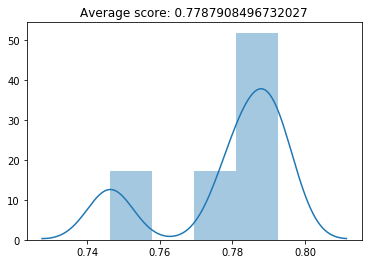

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree

dtc = DecisionTreeClassifier(random_state = 0)
cv_scores = cross_val_score(dtc, X, y, cv=5)
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

### Hypertuning the Decision trees hyperparameters with GridSearchCV

In [134]:
dtc2 = DecisionTreeClassifier()

tree_param = {'max_depth':range(3,20),'criterion': ['gini','entropy'], 'splitter': ['best', 'random']}

Dtree = GridSearchCV(dtc2, param_grid = tree_param, cv=5)
Dtree.fit(X, y)
tree_model = Dtree.best_estimator_
print('The Best Cross Validation Score is: ', Dtree.best_score_)
print('The Maximum depth of the tree is: ', Dtree.best_params_)


The Best Cross Validation Score is:  0.8466076696165191
The Maximum depth of the tree is:  {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}


C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Text(0.5, 1.0, 'Average score: 0.7942650886819056')

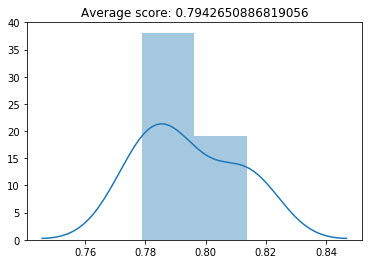

In [135]:
cv_scores2 = cross_val_score(dtc, X, y)
sns.distplot(cv_scores2)
plt.title('Average score: {}'.format(np.mean(cv_scores2)))

#### As we can observe the accuracy scores for the decision trees we can see that despite hypertuning parameters, the accuracy remained the same.

## Model Evaluation

#### The model that yielded the best results is logistic regression. The accuracy for logistic regression was the highest among all models at 0.89. The KNN classifier model yielded 0.85 with cross validation and after hypertuning the parameters with GridSearchCV. The LinearSVM model yielded an accuracy 0.88 before and after hypertuning. The Kernelized SVM also yielded an accuracy of 0.88 and the Decision tree resulted in the lowest accuracy of all the models which was 0.79.

## Evalution Strategy

#### To evaluate the models we have been using accuracy. The accuracy metric determines what model identifies relationships and patterns best between variables in a dataset in relation to the inputs and targets of the data. If we can select a model that does this best, we can correctly predict the outcome. In this case whether or not a person will have attrition due to other factors in their work life.

## Link to Datasets:
regression : https://www.kaggle.com/orgesleka/used-cars-database
Classification : https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset